In [23]:
%matplotlib nbagg
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_finance import candlestick_ohlc

import matplotlib.dates as mdates
import pandas_datareader.data as web

C:\Users\Yash Gupta\Anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [2]:
style.use('ggplot')

In [4]:
'''start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)
df = web.DataReader('TSLA', 'yahoo', start, end)'''

In [3]:
df.to_csv('tsla.csv')

NameError: name 'df' is not defined

In [41]:
df = pd.read_csv('tsla.csv',parse_dates=True, index_col=0)

<IPython.core.display.Javascript object>


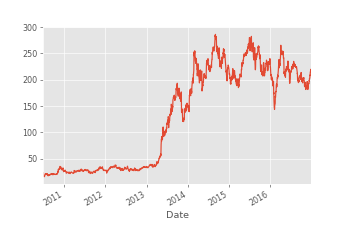

In [34]:
df['Adj Close'].plot()
plt.show()

<IPython.core.display.Javascript object>


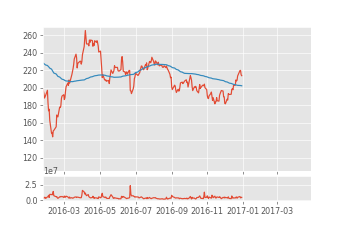

In [40]:
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()

ax1 = plt.subplot2grid((6,1), (0,0),rowspan=5,colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0),rowspan=1,colspan=1,sharex=ax1)

ax1.plot(df.index,df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.plot(df.index, df['Volume'])

plt.show()

In [ ]:
df['Adj Close'].plot()
plt.show()

In [42]:
df = pd.read_csv('tsla.csv',parse_dates=True, index_col=0)

In [43]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.000000,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.420000,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.920000,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.100000,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.000000,15.830000,20.000000,16.110001,6866900,16.110001
...,...,...,...,...,...,...
2016-12-23,213.449997,207.710007,208.000000,213.339996,4670500,213.339996
2016-12-27,222.250000,214.419998,214.880005,219.529999,5915700,219.529999
2016-12-28,223.800003,217.199997,221.529999,219.740005,3782500,219.740005


In [68]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

In [69]:
df_ohlc.reset_index(inplace = True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

In [71]:
df_ohlc.head()

,Date,open,high,low,close
0,733952.0,23.889999,23.889999,15.800000,17.459999
1,733962.0,17.400000,20.639999,17.049999,20.639999
2,733972.0,21.910000,21.910000,20.219999,20.719999
3,733982.0,20.350000,21.950001,19.590000,19.590000
4,733992.0,19.600000,19.600000,17.600000,19.150000


<IPython.core.display.Javascript object>


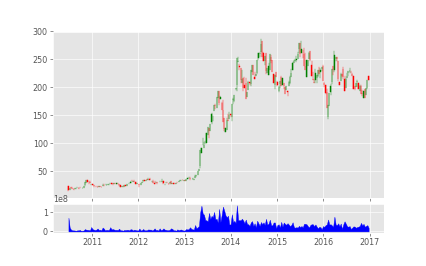

In [79]:
ax1 = plt.subplot2grid((6,1), (0,0),rowspan=5,colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0),rowspan=1,colspan=1,sharex=ax1)
ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup = 'green')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,color = 'b')
plt.show()

In [3]:
import bs4 as bs
import pickle
import requests
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
import os

def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text)
    table = soup.find('table', {'id':'constituents'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker[:-1])
       
    with open("sp500tickers.txt","wb") as f:
        pickle.dump(tickers, f)
    return tickers
#save_sp500_tickers()

def get_data_from_yahoo():
    
    with open('sp500tickers.txt','rb') as f:
        tickers = pickle.load(f)
        
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
        
    start = dt.datetime(2000,1,1)
    end = dt.datetime(2016,12,31)
    
    for ticker in tickers:
        print(ticker)
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            try:
                df = web.DataReader(ticker, 'yahoo', start, end)
                df.to_csv('stock_dfs/{}.csv'.format(ticker))
            except:
                continue
        else:
            print('Already have {}'.format(ticker))
            
get_data_from_yahoo()
        
    

MMM
Already have MMM
ABT
Already have ABT
ABBV
Already have ABBV
ABMD
Already have ABMD
ACN
Already have ACN
ATVI
Already have ATVI
ADBE
Already have ADBE
AMD
Already have AMD
AAP
Already have AAP
AES
Already have AES
AFL
Already have AFL
A
Already have A
APD
Already have APD
AKAM
Already have AKAM
ALK
Already have ALK
ALB
Already have ALB
ARE
Already have ARE
ALXN
Already have ALXN
ALGN
Already have ALGN
ALLE
Already have ALLE
AGN
Already have AGN
ADS
Already have ADS
LNT
Already have LNT
ALL
Already have ALL
GOOGL
Already have GOOGL
GOOG
Already have GOOG
MO
Already have MO
AMZN
Already have AMZN
AMCR
Already have AMCR
AEE
Already have AEE
AAL
Already have AAL
AEP
Already have AEP
AXP
Already have AXP
AIG
Already have AIG
AMT
Already have AMT
AWK
Already have AWK
AMP
Already have AMP
ABC
Already have ABC
AME
Already have AME
AMGN
Already have AMGN
APH
Already have APH
ADI
Already have ADI
ANSS
Already have ANSS
ANTM
Already have ANTM
AON
Already have AON
AOS
Already have AOS
APA
Alre

In [10]:
def compile_data():
    with open("sp500tickers.txt", "rb") as f:
        tickers = pickle.load(f)
        
    main_df = pd.DataFrame()
    
    for count,ticker in enumerate(tickers):
        if os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            
            df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
            df.set_index('Date', inplace=True)

            df.rename(columns = {'Adj Close' : ticker}, inplace=True)
            df.drop(['Low','Open', 'High', 'Close', 'Volume'], 1, inplace=True)

            if main_df.empty:
                main_df = df
            else:
                main_df = main_df.join(df,how = 'outer')

            if count%10 == 0 :
                print(count)

            #print(main_df)

    main_df.to_csv('sp500_joined_closed.csv')
    
compile_data()
    

0
10
20
30
40
50
60
70
100
110
120
140
150
160
170
180
190
200
210
220
230
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500


<IPython.core.display.Javascript object>


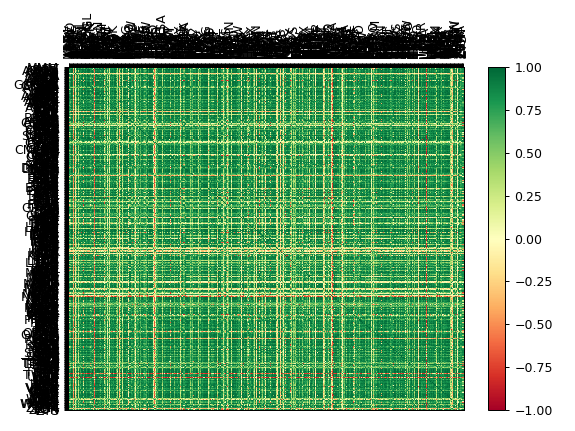

In [24]:
import matplotlib.pyplot as plt
from matplotlib import style


def visualize_data():
    df = pd.read_csv('sp500_joined_closed.csv')

    df_corr = df.corr()
    
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    heatmap = ax.pcolor(data, cmap = plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    plt.tight_layout()
    plt.show()
    
visualize_data()

In [57]:
def process_data_for_labels(ticker):
    hm_days = 7
    df = pd.read_csv('sp500_joined_closed.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)
    
    for i in range(1,hm_days+1):
        df['{}_{}d'.format(ticker, i)] = (df[ticker].shift(+i) - df[ticker]) / df[ticker]
        
    df.fillna(0, inplace = True)
    
    return tickers,df
    #percentage change
process_data_for_labels('XOM')

(['MMM',
  'ABT',
  'ABBV',
  'ABMD',
  'ACN',
  'ATVI',
  'ADBE',
  'AMD',
  'AAP',
  'AES',
  'AFL',
  'A',
  'APD',
  'AKAM',
  'ALK',
  'ALB',
  'ARE',
  'ALXN',
  'ALGN',
  'ALLE',
  'AGN',
  'ADS',
  'LNT',
  'ALL',
  'GOOGL',
  'GOOG',
  'MO',
  'AMZN',
  'AMCR',
  'AEE',
  'AAL',
  'AEP',
  'AXP',
  'AIG',
  'AMT',
  'AWK',
  'AMP',
  'ABC',
  'AME',
  'AMGN',
  'APH',
  'ADI',
  'ANSS',
  'ANTM',
  'AON',
  'AOS',
  'APA',
  'AIV',
  'AAPL',
  'AMAT',
  'APTV',
  'ADM',
  'ANET',
  'AJG',
  'AIZ',
  'T',
  'ATO',
  'ADSK',
  'ADP',
  'AZO',
  'AVB',
  'AVY',
  'BKR',
  'BLL',
  'BAC',
  'BK',
  'BAX',
  'BDX',
  'BBY',
  'BIIB',
  'BLK',
  'BA',
  'BKNG',
  'BWA',
  'BXP',
  'BSX',
  'BMY',
  'AVGO',
  'BR',
  'CHRW',
  'COG',
  'CDNS',
  'CPB',
  'COF',
  'CPRI',
  'CAH',
  'KMX',
  'CCL',
  'CAT',
  'CBOE',
  'CBRE',
  'CDW',
  'CE',
  'CNC',
  'CNP',
  'CTL',
  'CERN',
  'CF',
  'SCHW',
  'CHTR',
  'CVX',
  'CMG',
  'CB',
  'CHD',
  'CI',
  'CINF',
  'CTAS',
  'CSCO',
  'C'

In [59]:
df['XOM'].shift(+1)

Date
1999-12-31          NaN
2000-01-03    22.168360
2000-01-04    21.549223
2000-01-05    21.136469
2000-01-06    22.288738
                ...    
2016-12-23    79.077309
2016-12-27    78.938072
2016-12-28    78.972885
2016-12-29    78.581284
2016-12-30    78.624802
Name: XOM, Length: 4278, dtype: float64

In [62]:
from collections import Counter

def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0

def extract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)
    
    df['{}_target'.format(ticker)] = list(map( buy_sell_hold,
                                            df['{}_1d'.format(ticker)],
                                            df['{}_2d'.format(ticker)],
                                            df['{}_3d'.format(ticker)], 
                                            df['{}_4d'.format(ticker)],
                                            df['{}_5d'.format(ticker)],
                                            df['{}_6d'.format(ticker)],
                                            df['{}_7d'.format(ticker)]  
                                            ))
    
    vals = df['{}_target'.format(ticker)].values.tolist()
    #print('vals',vals)
    str_vals = [str(i) for i in vals]
    #print('Data spread:', Counter(str_vals) )
    #print(df)
    
    df.fillna(0, inplace = True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)
    
    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)
    
    X = df_vals.values
    print(df_vals)
    y = df['{}_target'.format(ticker)].values
    
    return X, y, df

extract_featuresets('XOM')

                 MMM       ABT      ABBV      ABMD       ACN      ATVI  \
Date                                                                     
1999-12-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2000-01-03 -0.035760 -0.036144  0.000000 -0.006803  0.000000  0.073469   
2000-01-04 -0.039735 -0.028572  0.000000 -0.023973  0.000000 -0.030418   
2000-01-05  0.028965 -0.001838  0.000000  0.010526  0.000000  0.003921   
2000-01-06  0.080429  0.034991  0.000000  0.001736  0.000000 -0.019532   
...              ...       ...       ...       ...       ...       ...   
2016-12-23 -0.002511  0.003395  0.011028  0.007441 -0.002632  0.001646   
2016-12-27  0.000951  0.004685  0.002567  0.012102  0.000596  0.000822   
2016-12-28 -0.004695 -0.009844 -0.003680 -0.008440 -0.007997 -0.002738   
2016-12-29  0.001853  0.002354  0.007387  0.007093  0.003430  0.001373   
2016-12-30  0.000897  0.002611 -0.001754 -0.007924  0.001026 -0.010142   

                ADBE       AMD       

(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.03576015, -0.03614435,  0.        , ...,  0.        ,
         -0.06230162,  0.        ],
        [-0.0397349 , -0.0285716 ,  0.        , ...,  0.        ,
         -0.04842358,  0.        ],
        ...,
        [-0.00469472, -0.00984427, -0.00367994, ...,  0.00155483,
         -0.01479624, -0.0052122 ],
        [ 0.00185311,  0.00235442,  0.00738721, ...,  0.0042694 ,
         -0.01132171,  0.00336825],
        [ 0.00089686,  0.00261066, -0.00175369, ..., -0.00289857,
          0.00584236, -0.0016784 ]]),
 array([0, 1, 1, ..., 0, 0, 0], dtype=int64),
                    MMM        ABT       ABBV        ABMD         ACN  \
 Date                                                                   
 1999-12-31   27.323933   6.810734   0.000000   18.375000    0.000000   
 2000-01-03   26.346825   6.564564   0.000000   18.250000    0.000000   
 2000-01-04   25.299936   6.377004 

In [66]:
from sklearn import svm, neighbors
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

,0
0,2.000000
1,1.500000
2,1.333333
3,1.250000
4,0.200000
5,0.333333
6,0.428571
